<ipython-input-7-e8ee4e84afd1>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Year", y="% of Views", data=df, ax=ax, palette=["blue", "orange"])


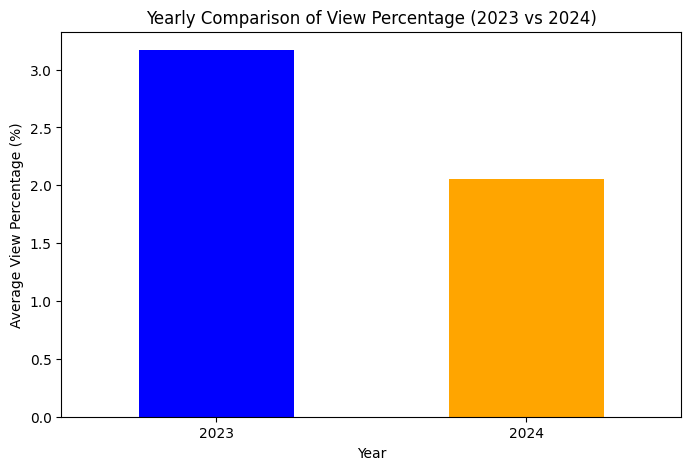

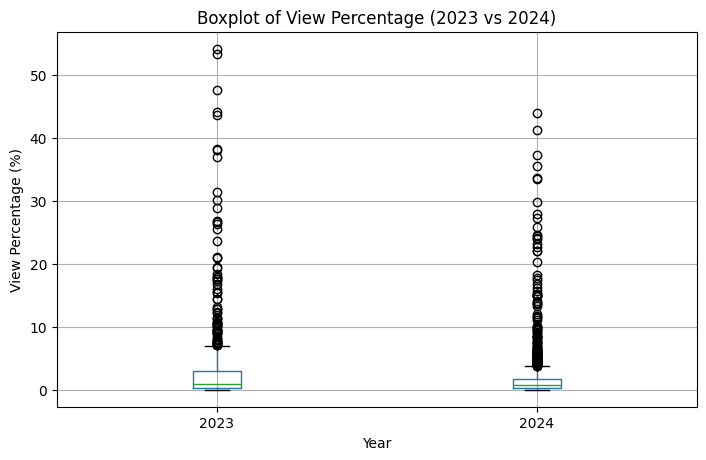

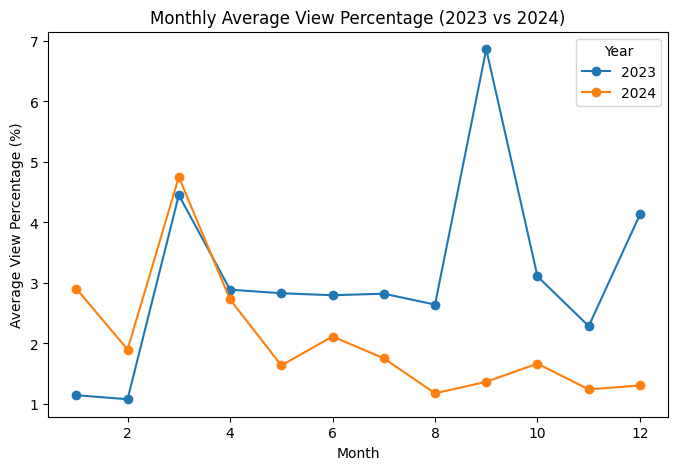

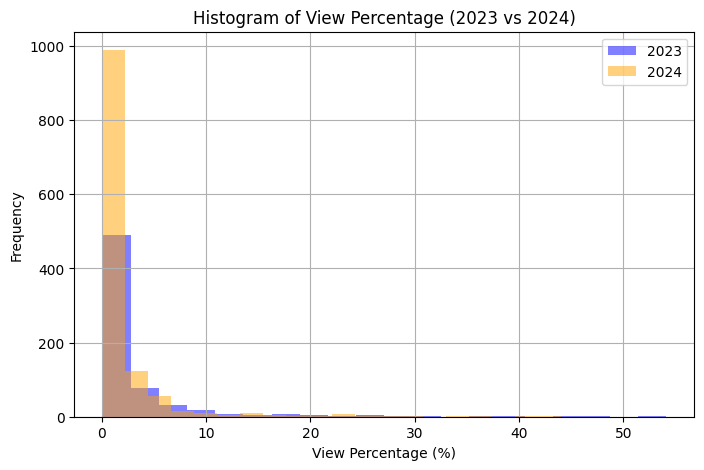

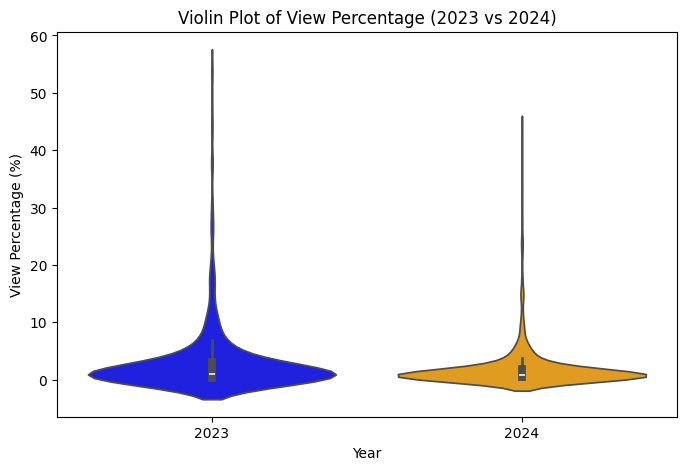

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file_path_2023 = "/content/Copy of 2023_merged_All.csv"
file_path_2024 = "/content/Copy of 2024-Links.csv"

df_2023 = pd.read_csv(file_path_2023)
df_2024 = pd.read_csv(file_path_2024)

# Convert % of Views to numeric after removing '%'
df_2023["% of Views"] = df_2023["% of Views"].str.rstrip('%').astype(float)
df_2024["% of Views"] = df_2024["% of Views"].str.rstrip('%').astype(float)

# Extract year from the Date column
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine the datasets
df = pd.concat([df_2023, df_2024], ignore_index=True)

# Convert Date to datetime and extract month
df["Month"] = pd.to_datetime(df["Date"], errors='coerce').dt.month

# Group data by Year and calculate the average View Percentage
yearly_avg_views = df.groupby("Year")["% of Views"].mean()

# Create five different year-wise comparative visualizations
figures = []

# 1. Bar Chart: Yearly Comparison of Average View Percentage
fig, ax = plt.subplots(figsize=(8, 5))
yearly_avg_views.plot(kind="bar", ax=ax, color=['blue', 'orange'])
ax.set_title("Yearly Comparison of View Percentage (2023 vs 2024)")
ax.set_ylabel("Average View Percentage (%)")
ax.set_xticklabels(yearly_avg_views.index, rotation=0)
figures.append(fig)

# 2. Boxplot: Distribution of View Percentage by Year
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column="% of Views", by="Year", ax=ax)
ax.set_title("Boxplot of View Percentage (2023 vs 2024)")
ax.set_ylabel("View Percentage (%)")
fig.suptitle("")
figures.append(fig)

# 3. Line Chart: Monthly Trend of View Percentage for Each Year
df_grouped = df.groupby(["Year", "Month"])["% of Views"].mean().unstack(0)

fig, ax = plt.subplots(figsize=(8, 5))
df_grouped.plot(ax=ax, marker="o")
ax.set_title("Monthly Average View Percentage (2023 vs 2024)")
ax.set_xlabel("Month")
ax.set_ylabel("Average View Percentage (%)")
ax.legend(title="Year")
figures.append(fig)

# 4. Histogram: Distribution of View Percentage by Year
fig, ax = plt.subplots(figsize=(8, 5))
df[df["Year"] == 2023]["% of Views"].hist(alpha=0.5, bins=20, label="2023", ax=ax, color="blue")
df[df["Year"] == 2024]["% of Views"].hist(alpha=0.5, bins=20, label="2024", ax=ax, color="orange")
ax.set_title("Histogram of View Percentage (2023 vs 2024)")
ax.set_xlabel("View Percentage (%)")
ax.set_ylabel("Frequency")
ax.legend()
figures.append(fig)

# 5. Violin Plot: View Percentage Distribution Across Years
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(x="Year", y="% of Views", data=df, ax=ax, palette=["blue", "orange"])
ax.set_title("Violin Plot of View Percentage (2023 vs 2024)")
ax.set_ylabel("View Percentage (%)")
figures.append(fig)

# Display all plots
for fig in figures:
    plt.show(fig)
